In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
import pandas as pd
# 1 TABLE --> df_final_demo
df1 = pd.read_csv("data/raw/df_final_demo.txt")
df1.shape

(70609, 9)

In [3]:
#df_final_demo (File 1)
df1.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [4]:
#Data Cleaning for df_final_demo.txt
df1.nunique()


client_id           70609
clnt_tenure_yr         54
clnt_tenure_mnth      482
clnt_age              165
gendr                   4
num_accts               8
bal                 70333
calls_6_mnth            8
logons_6_mnth           9
dtype: int64

In [5]:
df1.gendr.unique()
#df1['gendr'].fillna(' ')
df1['gendr'].value_counts()

#Replace gendr X and U for nothing
df1['gendr'] = df1['gendr'].replace({'X': ' ', 'U': ' '})
df1['gendr'].value_counts()


gendr
     24125
M    23724
F    22746
Name: count, dtype: int64

In [6]:
# 2 TABLE --> df_final_web_data_pt_1

In [7]:
import pandas as pd
df2 = pd.read_csv("data/raw/df_final_web_data_pt_1.txt")
df2.shape

(343141, 5)

In [8]:
#df_final_web_data_pt_1 (File 3)
df2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [9]:
#number of clients id
df2.nunique()
#df2.client_id.nunique()

client_id        58391
visitor_id       62936
visit_id         75256
process_step         5
date_time       282666
dtype: int64

In [10]:
import pandas as pd
df3 = pd.read_csv("data/raw/df_final_web_data_pt_2.txt")
df3.shape

(412264, 5)

In [11]:
#df_final_web_data_pt_2 (File 4)
df3.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [12]:
df3.nunique()
#df3['client_id'].isnull()
df3.isna().any()

client_id       False
visitor_id      False
visit_id        False
process_step    False
date_time       False
dtype: bool

In [13]:
#concat df2 and df3
#pd.concat([df2_client_id, df3_client_id], axis=1)
new_df2_df3 = pd.concat([df2, df3], axis=0)
display(new_df2_df3)
new_df2_df3.nunique()


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64

In [14]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
import pandas as pd
df4 = pd.read_csv("data/raw/df_final_experiment_clients.txt")
df4.shape

(70609, 2)

In [40]:
#df_final_experiment_clients (File 2)
df4.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [15]:
df4.nunique()
df4.client_id.nunique()
#df4.Variation.nunique()
#df4.isnull()
df4.isna().sum()

client_id        0
Variation    20109
dtype: int64

In [16]:

#concat df1(client_id, clnt_tenure_yr, clnt_tenure_mon, clnt_age, gend, num_accts, bal, cal_6_mnths, logons_6_mnths) + df4(client_id, variation)
new_df1_df4 = pd.merge(df1, df4)
display(new_df1_df4)
new_df1_df4.nunique()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


client_id           70609
clnt_tenure_yr         54
clnt_tenure_mnth      482
clnt_age              165
gendr                   3
num_accts               8
bal                 70333
calls_6_mnth            8
logons_6_mnth           9
Variation               2
dtype: int64

In [17]:
#df1.gendr.unique()
#df1['gendr'].fillna(' ')
new_df1_df4['gendr'].value_counts()

#Replace gendr X and U for nothing
#new_df1_df4['gendr'] = df1['gendr'].replace({'X': ' ', 'U': ' '})
#df1['gendr'].value_counts()


gendr
     24125
M    23724
F    22746
Name: count, dtype: int64

In [18]:
#We are changing columns names: 'gendr': 'gender', 'num_accts': 'number_of_accounts', 'bal': 'balance'
new_df1_df4.rename(columns={'gendr': 'gender', 'num_accts': 'number_of_accounts', 'bal': 'balance'},inplace=True)

In [117]:
# TOP10 clients by balance amount
df1_4_sorted = new_df1_df4.sort_values(by='balance', ascending=False)
top_10_values = df1_4_sorted.head(10)
top_10_values

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,number_of_accounts,balance,calls_6_mnth,logons_6_mnth,Variation
39367,9286288,21.0,254.0,62.5,M,3.0,16320040.15,6.0,9.0,Test
23849,7070097,11.0,133.0,53.0,M,2.0,8986419.77,6.0,9.0,Test
13318,9440656,7.0,94.0,63.0,F,2.0,8292996.21,6.0,9.0,Control
2171,2291985,7.0,85.0,41.0,M,2.0,8247729.97,1.0,4.0,Control
20871,1678193,24.0,299.0,65.5,M,3.0,8137343.24,6.0,9.0,Test
31811,6762377,16.0,193.0,41.5,F,3.0,8045102.60,6.0,9.0,Test
14057,3519657,18.0,218.0,66.5,M,6.0,7741994.01,6.0,9.0,Control
21184,987970,14.0,179.0,74.5,M,3.0,7339443.17,4.0,9.0,Control
33222,857273,31.0,376.0,56.5,M,5.0,6716305.28,6.0,9.0,Control
22943,9290030,28.0,341.0,67.5,M,4.0,6353000.43,5.0,8.0,Test


In [19]:
#Describing clnt_tenure_yr and clnt_age
new_df1_df4[['clnt_tenure_yr','clnt_age']].describe()

,clnt_tenure_yr,clnt_age
count,70595.000000,70594.000000
mean,12.052950,46.442240
std,6.871819,15.591273
min,2.000000,13.500000
25%,6.000000,32.500000
50%,11.000000,47.000000
75%,16.000000,59.000000
max,62.000000,96.000000


In [21]:
new_df1_df4['gendr'].value_counts()

KeyError: 'gendr'

In [22]:
new_df1_df4.Variation.unique()
new_df1_df4['Variation'].value_counts()

#to count how many nan I do have
new_df1_df4.isna().sum()


client_id                 0
clnt_tenure_yr           14
clnt_tenure_mnth         14
clnt_age                 15
gender                   14
number_of_accounts       14
balance                  14
calls_6_mnth             14
logons_6_mnth            14
Variation             20109
dtype: int64

In [23]:
#We have dreopped these 20109 lines rows with NAN, we had 70609 and now we have: 50487
new_df1_df4.dropna(inplace=True)
new_df1_df4['Variation'].value_counts()
new_df1_df4.shape

(50487, 10)

/var/folders/9p/vp93bjn92s7ggp8mhnv9r3nw0000gn/T/ipykernel_95301/2055714976.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_df2_df3[ new_df2_df3['client_id'].isin(top10_client_id)], x='process_step', y='client_id', palette="coolwarm", ax=axes);


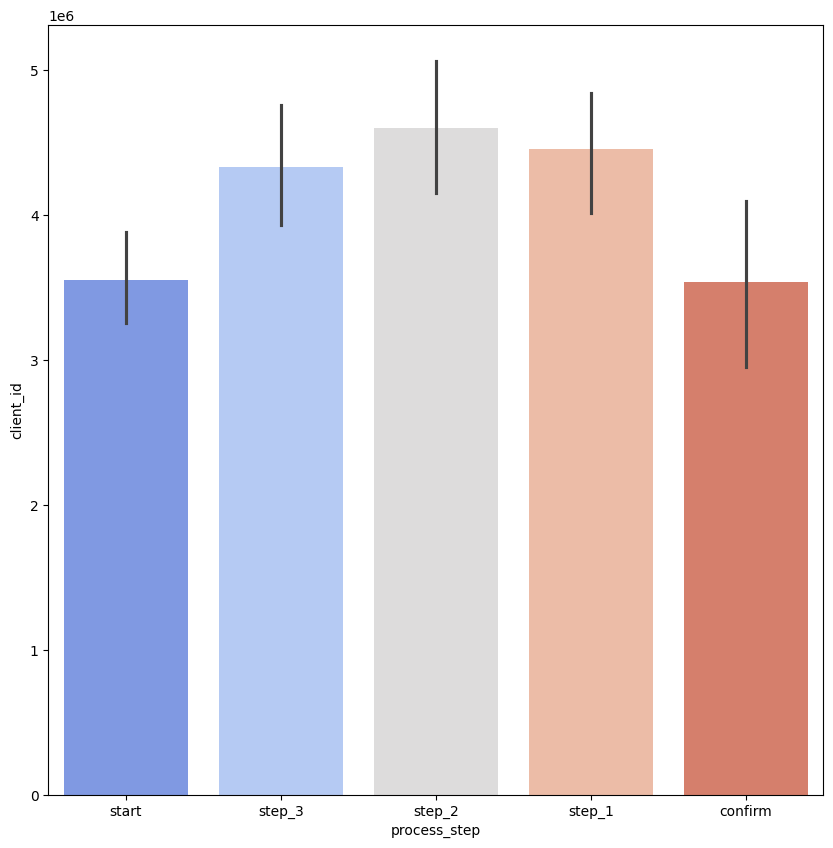

In [24]:
#DAY2 
#client behavior analysis
# I am going to use  this df: new_df2_df3  process_step	| client_id
#1. Who are the primary clients using this online process?
#2. Are the primary clients younger or older, new or long-standing?
top10_client_id = new_df2_df3['client_id'].value_counts().iloc[:10].index
fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(data=new_df2_df3[ new_df2_df3['client_id'].isin(top10_client_id)], x='process_step', y='client_id', palette="coolwarm", ax=axes);

In [25]:
#2. Are the primary clients younger or older, new or long-standing?

In [26]:
#DAY 3 SUCCESS INDICATORS
#new_df2_df3['client_id'].value_counts()
#new_df2_df3['visitor_id'].value_counts()
#new_df2_df3['visit_id'].value_counts()

#Completion rate: The total users who reach the final 'confirm step' were 102963
#new_df2_df3['process_step'].value_counts()

#Time spent on each step: 
#to calculate the average date_time of each step

#1. Ensure date_time is in datetime format
new_df2_df3['date_time'] = pd.to_datetime(new_df2_df3['date_time'])

# 2. Sort by user and time
new_df2_df3 = new_df2_df3.sort_values(by=['client_id', 'date_time'])
# 3. Calculate time difference to next row per user (new columns time_spent is added)
new_df2_df3['time_spent'] = new_df2_df3.groupby('client_id')['date_time'].shift(-1) - new_df2_df3['date_time']

# 4. Compute average time spent per process_step 
avg_time_per_step = new_df2_df3.groupby('process_step')['time_spent'].mean()

print(avg_time_per_step)

#testing
#print(new_df2_df3.columns)
#print(new_df2_df3['date_time'].dtype)
#print(new_df2_df3['date_time'].isnull().sum())
#print(new_df2_df3['process_step'].unique())
#print(new_df2_df3[['client_id', 'process_step', 'date_time', 'time_spent']].head(10))


process_step
confirm   3 days 00:13:54.903339743
start     0 days 22:57:48.680451110
step_1    0 days 09:20:59.881194241
step_2    0 days 05:14:25.662991014
step_3    0 days 09:01:39.903402084
Name: time_spent, dtype: timedelta64[ns]


In [27]:
#DAY 3 SUCCESS INDICATORS
# Error Rates: If there's a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

In [28]:
#1. to order by client_id and date_time
new_df2_df3 = new_df2_df3.sort_values(by=['client_id', 'date_time'])

#2. To calculate the next step for each user
new_df2_df3['next_step'] = new_df2_df3.groupby('client_id')['process_step'].shift(-1)

#3. To check if went back
new_df2_df3['error_backstep'] = new_df2_df3['next_step'] < new_df2_df3['process_step']
#this creates a col booleana T/F

#number of errors per step
error_count_by_step = new_df2_df3.groupby('process_step')['error_backstep'].sum()
print(error_count_by_step.sort_values(ascending=False))

#%
error_percentage_by_step = new_df2_df3.groupby('process_step')['error_backstep'].mean() * 100
# Mostrar el resultado ordenado
print(error_percentage_by_step.sort_values(ascending=False))

process_step
step_3     102721
step_1      28577
step_2      20428
start         284
confirm         0
Name: error_backstep, dtype: int64
process_step
step_3     91.517436
step_1     17.511168
step_2     15.352242
start       0.116420
confirm     0.000000
Name: error_backstep, dtype: float64


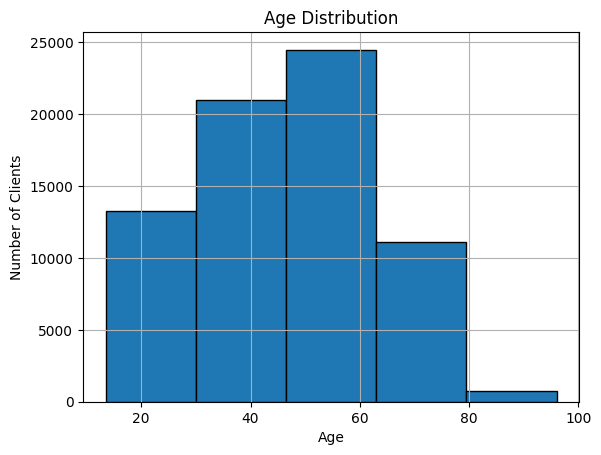

In [32]:
df1['clnt_age'].hist(bins=5, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.grid(True)
plt.show()

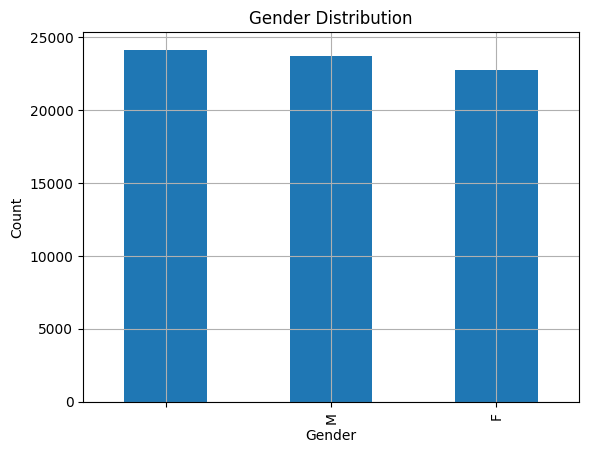

In [33]:
import matplotlib.pyplot as plt

df1['gendr'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()

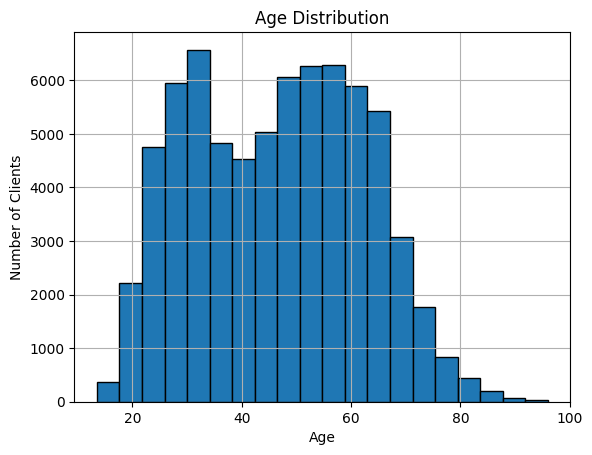

In [34]:
df1['clnt_age'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.grid(True)
plt.show()

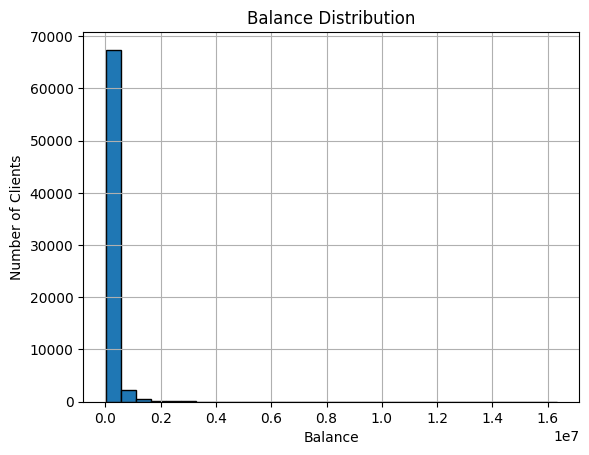

In [35]:
df1['bal'].hist(bins=30, edgecolor='black')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Number of Clients')
plt.grid(True)
plt.show()

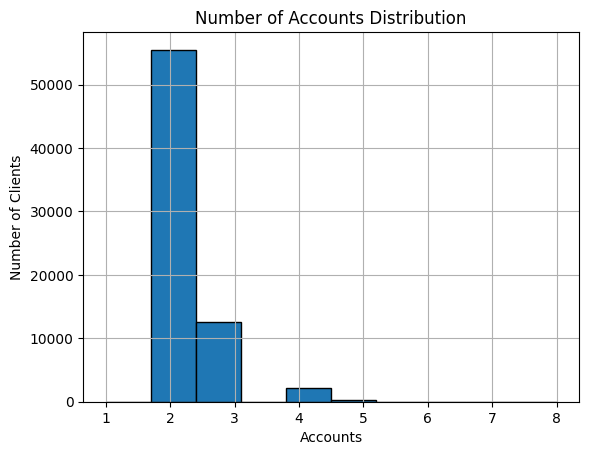

In [36]:
df1['num_accts'].hist(bins=10, edgecolor='black')
plt.title('Number of Accounts Distribution')
plt.xlabel('Accounts')
plt.ylabel('Number of Clients')
plt.grid(True)
plt.show()